In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
x,y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [3]:
x_train.shape,x_test.shape

((400, 2), (100, 2))

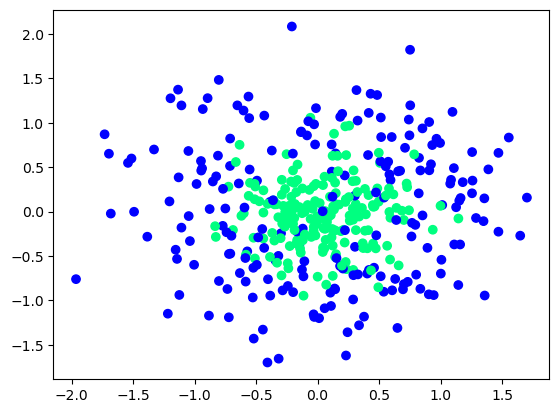

In [4]:
plt.scatter(x=x_train[:,0],y=x_train[:,1],c=y_train,cmap='winter')

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

<Axes: >

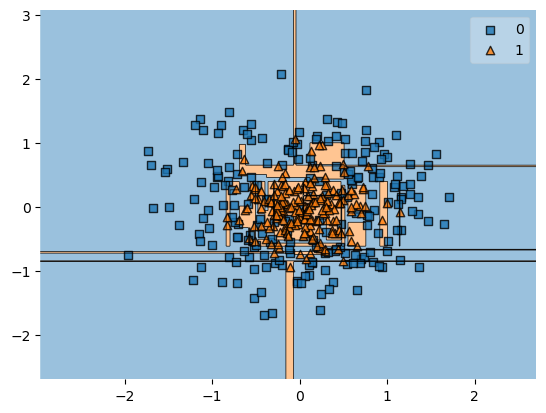

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(clf=dt,X=x_train,y=y_train)

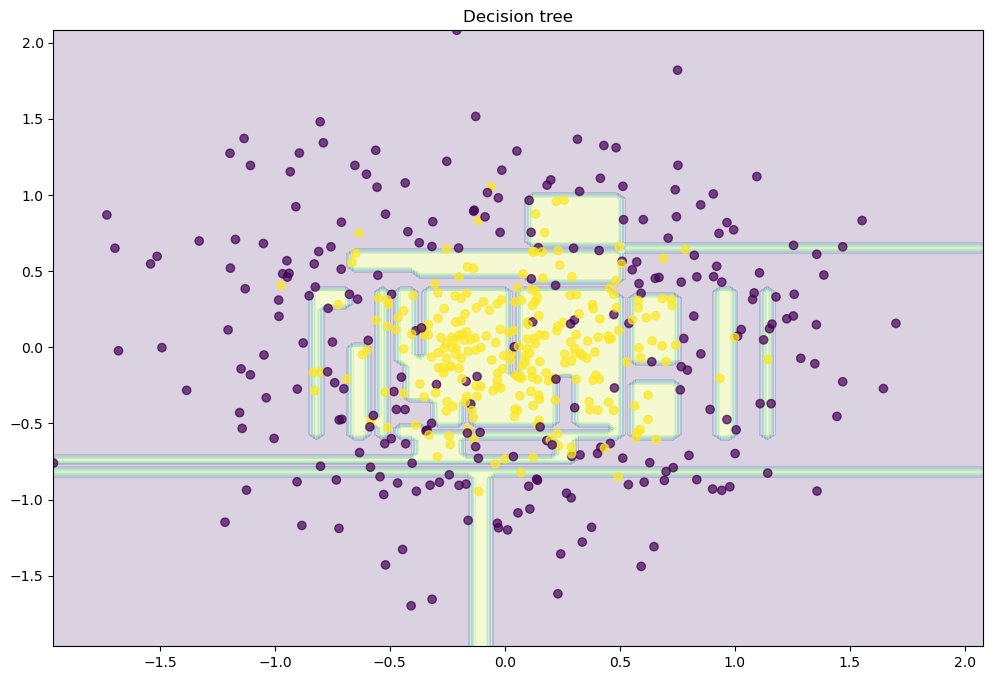

In [19]:
import numpy as np
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(x.min(), x.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=.2)
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', alpha=0.7)
plt.title("Decision tree")
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

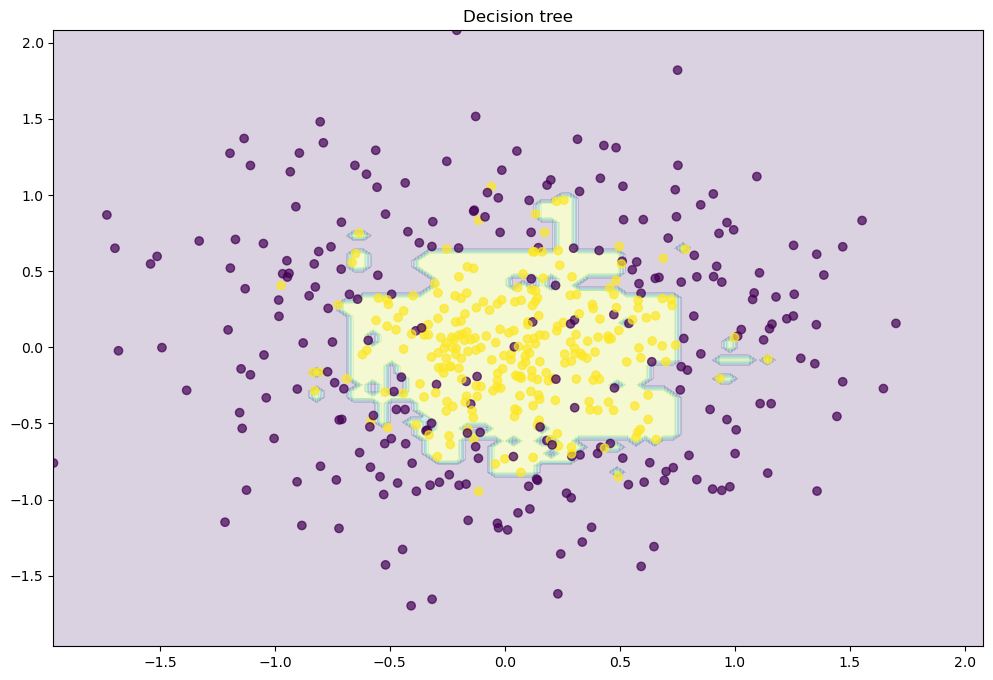

In [23]:


plt.figure(figsize=(12, 8))
x_range = np.linspace(x.min(), x.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rfc.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

In [24]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

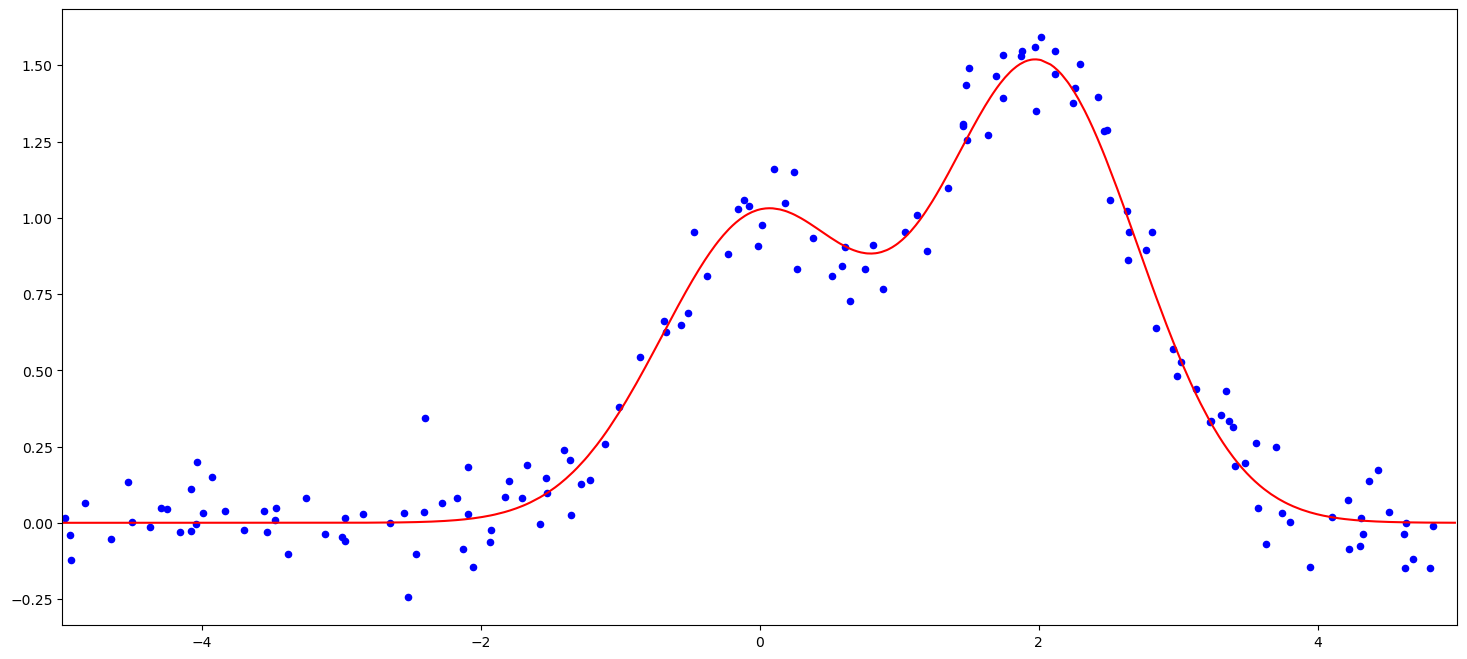

In [25]:

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

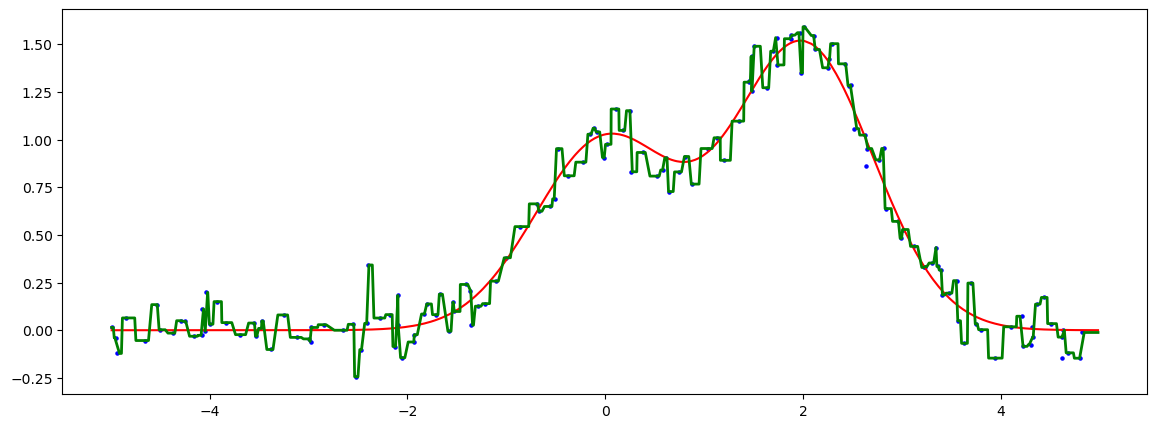

In [34]:
plt.figure(figsize=(14,5))
y_pred = dtr.predict(X_test)
plt.scatter(X_train, y_train, c="b", s=5)
plt.plot(X_test, f(X_test), "r")
plt.plot(X_test,y_pred,'g',lw=2)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

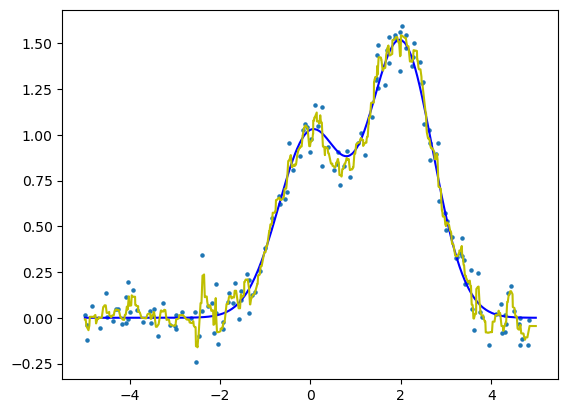

In [47]:
plt.scatter(X_train,y_train,s=5)
plt.plot(X_test,f(X_test) , c="b")
# plt.plot(X_test,y_pred,c='g')
y_pred = rfr.predict(X_test)
plt.plot(X_test,y_pred,c='y')